## Numerical integration of coupled first-order ODEs

Adapted from http://www.eg.bucknell.edu/physics/ph310/jupyter/ode_numerical.ipynb

#### Damped harmonic oscillator
The equation of motion for a damped harmonic oscillator is ta
$$ \frac{d^2x}{dt^2} = -\omega_0^2 x - \gamma \frac{dx}{dt}. $$
Working with dimensionless variables in which time is measured in 
units of $\omega_0^{-1}$ this equation of motion can be rewritten as 
$$ \frac{d^2x}{dt^2} = -x - b\frac{dx}{dt},  $$
where $b = \gamma/\omega_0$.

This second order differential equation can be written as two coupled first-order equations:

\begin{eqnarray*}
\frac{dx}{dt} &=& v\\
\frac{dv}{dt} &=& -x - bv
\end{eqnarray*}

The function below returns the RHS of these differential equations; the lines above the `return` relates the elements of the array `u[i]` with variables that have more physical meaning.

In [44]:
import scipy as sp
from scipy import integrate   # not included in basic scipy

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib inline
#%matplotlib

In [45]:
# Function returning derivatives of the dependent quantities u[0] 
# and  u[1], or more physically, x and v.
def damped_osc(u,t,b):
    x = u[0]
    v = u[1]
    return (v,-x-b*v)

#### Initial conditions, and parameter(s)

In [46]:
x0 = 2
v0 = 0
b = 0.4  # Damping parameter
u0 = sp.array([x0,v0])

In following cell:
- Choose points for output.<br>
- Integrate.<br>
<b>Note:</b> `odeint` returns an array:<br>
  `[[x_0  v_0],`<br>
  `[x_1  v_1],`<br>
  `[x_2  v_2], ...]`<br>
  To get single list for `x` and single list for `v` we need the transpose of the returned array.<br>
  (Could also keep return as a single array if that's more useful down the road.)

In [48]:
t = sp.linspace(0,20,201)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
x, v = sp.integrate.odeint(damped_osc,u0,t,args=(b,)).T

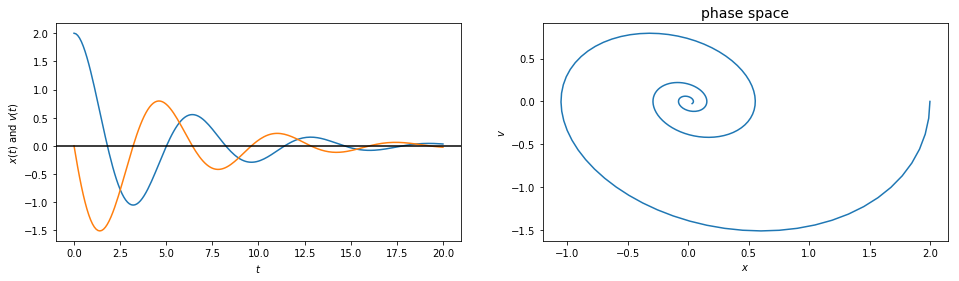

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16)
ax1.plot(t,x, label='y');
ax1.plot(t,v, label="y'");
ax1.axhline(0, color='k')
ax1.set_xlabel("$t$")
ax1.set_ylabel("$x(t)$ and $v(t)$")

ax2.set_xlabel("$x$")
ax2.set_ylabel("$v$")
ax2.set_title("phase space",fontsize=14)
ax2.plot(x,v);

In [50]:
from ipywidgets import interact

@interact(v0=(-10.0, 10.0), b=(-0.2,3,0.01))
def oscillator(x0=2.0, v0=0, b=0.4, tmax=20):
    u0 = sp.array([x0,v0])
    
    t = sp.linspace(0,tmax, 400)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
    x, v = sp.integrate.odeint(damped_osc,u0,t,args=(b,)).T
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figwidth(16)
    ax1.plot(t,x, label='y');
    ax1.plot(t,v, label="y'");
    ax1.axhline(0, color='k', lw=1)
    ax1.set_xlabel("$t$")
    ax1.set_ylabel("$x(t)$ and $v(t)$")

    ax2.set_xlabel("$x$")
    ax2.set_ylabel("$v$")
    ax2.set_title("phase space")
    ax2.axhline(0, color='k', lw=1)
    ax2.axvline(0, color='k', lw=1)
    ax2.plot(x,v);
    
    

interactive(children=(FloatSlider(value=2.0, description='x0', max=6.0, min=-2.0), FloatSlider(value=0.0, desc…

## Damping factor:

$${\displaystyle {\frac {\mathrm {d} ^{2}x}{\mathrm {d} t^{2}}}+2\zeta \omega _{0}{\frac {\mathrm {d} x}{\mathrm {d} t}}+\omega _{0}^{2}x=0,}$$

Where ${\displaystyle \zeta ={\frac {c}{2{\sqrt {mk}}}}}$ Damping Ratio

Solution is 

$$
{\displaystyle z(t)=A\mathrm {e} ^{-\zeta \omega _{0}t}\sin \left({\sqrt {1-\zeta ^{2}}}\omega _{0}t+\varphi \right),}
$$


In [51]:
from ipywidgets import interact
from numpy import vectorize, exp, sin, cos,  sqrt, pi as π

def sol(A,xi,w0, phi,t):
    if xi > 1:
        raise NotInplementedError("overdampded not implmented")
    return (A*exp(-xi*w0*t)*sin(sqrt(1-xi**2)*w0*t+phi),
           -xi*w0*A*exp(-xi*w0*t)*sin(sqrt(1-xi**2)*w0*t+phi)+
                  A*exp(-xi*w0*t)*cos(sqrt(1-xi**2)*w0*t+phi)*sqrt(1-xi**2)*w0)

@interact(xi=(-1.0, 2.0))
def oscillator(A=1.0,xi=0.2,w0=1.0, phi=π/4, tmax=20):

    
    t = sp.linspace(0,tmax, 400)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
    x,v = sol(A,xi,w0, phi,t)
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figwidth(16)
    ax1.plot(t,x, label='y');
    ax1.plot(t,v, label="y'");
    ax1.axhline(0, color='k', lw=1)
    ax1.set_xlabel("$t$")
    ax1.set_ylabel("$x(t)$ and $v(t)$")

    ax2.set_xlabel("$x$")
    ax2.set_ylabel("$v$")
    ax2.set_title("phase space")
    ax2.axhline(0, color='k', lw=1)
    ax2.axvline(0, color='k', lw=1)
    ax2.plot(x,v);
    
    

interactive(children=(FloatSlider(value=1.0, description='A', max=3.0, min=-1.0), FloatSlider(value=0.2, descr…

## Driving forces:

$${\displaystyle {\frac {\mathrm {d} ^{2}x}{\mathrm {d} t^{2}}}+2\zeta \omega _{0}{\frac {\mathrm {d} x}{\mathrm {d} t}}+\omega _{0}^{2}x={\frac {1}{m}}F_{0}\sin(\omega t),}$$

$${\displaystyle x(t)={\frac {F_{0}}{mZ_{m}\omega }}\sin(\omega t+\varphi ),}$$

$${\displaystyle Z_{m}={\sqrt {\left(2\omega _{0}\zeta \right)^{2}+{\frac {1}{\omega ^{2}}}(\omega _{0}^{2}-\omega ^{2})^{2}}}}$$

In [52]:
from functools import lru_cache

def Z(w0, xi, w):
    return sqrt(
        (2*w0*xi)**2+
        (w0**2-w**2)**2 / w**2
    )

$${\displaystyle \varphi =\arctan \left({\frac {2\omega \omega _{0}\zeta }{\omega ^{2}-\omega _{0}^{2}}}\right)+n\pi }$$

In [53]:
from numpy import arctan


def phase(xi, w0, w):
    if w == w0:
        return π/2
    return (arctan(
        2*w*w0*xi
        /
        (w**2-w0**2)
    )%π )
    

$${\displaystyle x(t)={\frac {F_{0}}{mZ_{m}\omega }}\sin(\omega t+\varphi ),}$$

In [54]:
def res(xi,w0, w, t):
    return 1/(Z(w0, xi, w)*w)*sin(w*t+phase(xi,w0,w))

In [57]:
import numpy as np
ws = np.linspace(0.01, 3, 80)

res_templates = [1/(Z(1,xit,ws)*ws) for xit in [0.3,0.5,1,2]]

    
@interact(xi=(0,1.5,0.1), w=(0,3,0.05))
def plot_response(xi=0.5, w=0.8):
    import numpy as np

    t = np.linspace(0, 20/w, 80)

    fig, ((ax0,ax), (ax1, aa)) = plt.subplots(2,2)
    fig.set_figwidth(16)
    fig.set_figheight(8)
    ax.plot(ws, 1/(Z(1,xi,ws)*ws))
    
    ax0.plot(t, res(xi, 1, w, t))
    ax0.plot(t, sin(w*t), '--')
    
    for rt in res_templates  :
        ax.plot(ws, rt, '--', lw=0.5)

        
    xis = np.linspace(0.3,sqrt(2)/2-0.001,20)
    wrs = sqrt(1-2*xis**2)
    
    ax.plot(wrs, [1/(Z(1,xir,wr)*wr) for xir,wr in zip(xis,wrs)], '--',lw=0.5)    
    
    
    ax.axvline(w, color='k', lw=1)
    ax1.axvline(w, color='k', lw=1)
    ax1.axhline(π/2, linestyle='--',  color='k', lw=1,)
    ax1.set_ylim(0, π+0.1)
    ax1.plot(ws, [phase(xi,1,u) for u in ws])


interactive(children=(FloatSlider(value=0.5, description='xi', max=1.5), FloatSlider(value=0.8, description='w…